## To predict Wine Quality using machine learning algorithm(classification)

### Dataset Information
The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are munch more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods. Two datasets were combined and few values were randomly removed.

Attribute Information:<br>
Input variables (based on physicochemical tests):<br>
1 - fixed acidity<br>
2 - volatile acidity<br>
3 - citric acid<br>
4 - residual sugar<br>
5 - chlorides<br>
6 - free sulfur dioxide<br>
7 - total sulfur dioxide<br>
8 - density<br>
9 - pH<br>
10 - sulphates<br>
11 - alcohol<br>
Output variable (based on sensory data):<br>
12 - quality (score between 0 and 10)<br>

## Import the important Libraries

In [1]:
%matplotlib inline
import numpy as np                # Linear algebra
import pandas as pd               # Data preprocessing
import matplotlib.pyplot as plt   # Visualization Library
import seaborn as sns             # Visualization Library
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

## Load the Dataset

In [2]:
df = pd.read_csv("E:/Capstone_project/winequality.csv")
df.head(5) # first 5 rows

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [3]:
df.tail(5)  #last 5 rows

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
6492  red            6.2             0.600         0.08             2.0   
6493  red            5.9             0.550         0.10             2.2   
6494  red            6.3             0.510         0.13             2.3   
6495  red            5.9             0.645         0.12             2.0   
6496  red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6494      0.076                 29.0                  40.0  0.99574  3.42   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
6492       0.58     10.5        5  
6493        NaN     11.2        6  
6494       0.75     11.0        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6

In [4]:
# check the dimentions/shape of the data
df.shape

(6497, 13)

In my dataset, there are 6497 observations/rows with 13 features. Out of this, 'quality' is target variable and others are independent variable

In [5]:
# Datatype information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


#### Observations:
1. All variables are numeric datatype except type.
2. Missing values are present in some of the variables like fixed acidity,volatile acidity,citric acid etc.

In [6]:
# Statistical summary for numeric variables
df.describe(include='number')

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

## Exploratory Data Analysis(EDA)

In [7]:
# check for null values
df.isna().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

In [8]:
# Fill all the NA values with its mean/media

df['fixed acidity'].fillna(df['fixed acidity'].mean(), inplace=True)
df['volatile acidity'].fillna(df['volatile acidity'].mean(), inplace=True)
df['citric acid'].fillna(df['citric acid'].mean(), inplace=True)
df['residual sugar'].fillna(df['residual sugar'].median(), inplace=True)
df['chlorides'].fillna(df['chlorides'].mean(), inplace=True)
df['pH'].fillna(df['pH'].mean(), inplace=True)
df['sulphates'].fillna(df['sulphates'].mean(), inplace=True)

In [9]:
# Again recheck after fill the missing values
df.isna().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
# sepearte out the numeric features
num_col = df.select_dtypes(np.number)
num_col.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

<AxesSubplot:xlabel='type', ylabel='count'>

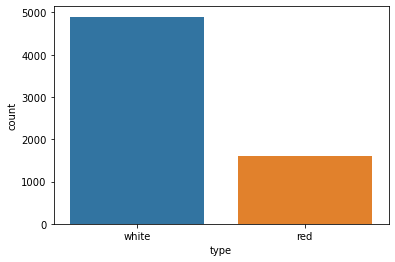

In [11]:
# countplot for wine type
sns.countplot(df['type'])

#### Observations:
1. There are more white wine in our data than red wine.
2. count of white wine is near about 5000 records.
3. count of red wine is near about 2000 records.

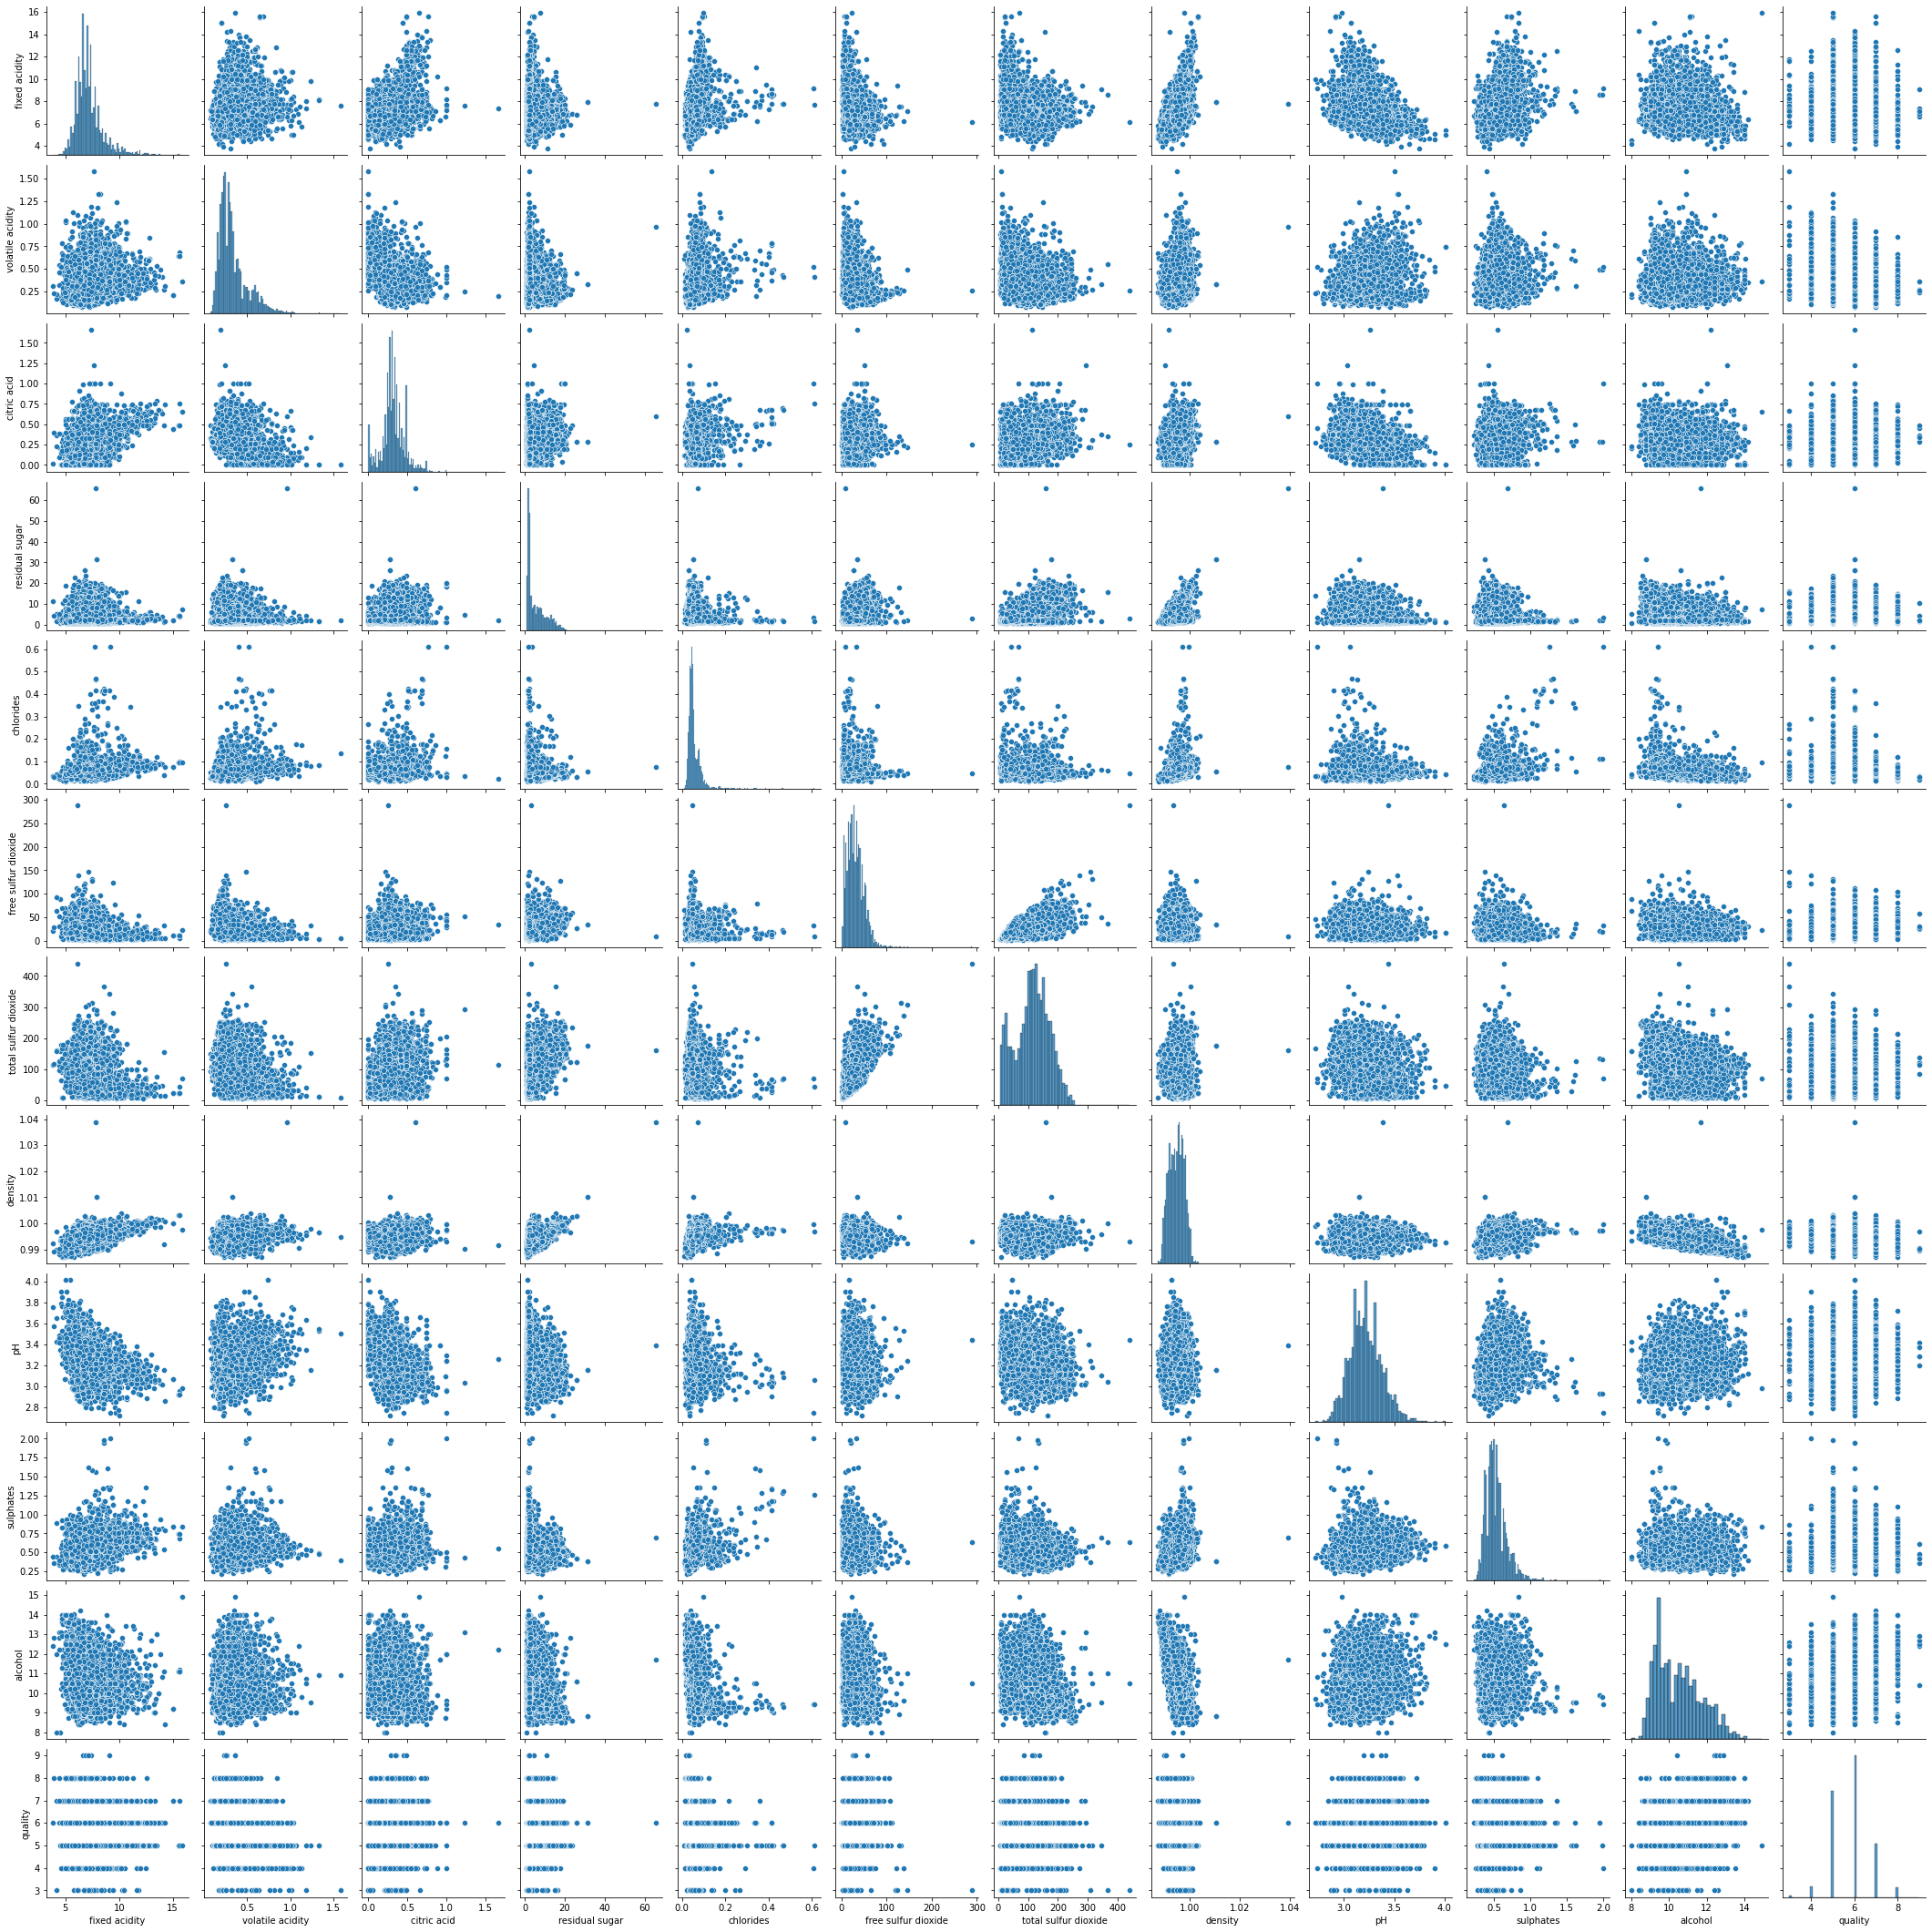

In [12]:
#pairplot
sns.pairplot(num_col)

From above pairplot,
1. The diagonal elements represents the distribution of a perticular feature.
2. Other than diagonal elements represents the relationship between each and every feature. 

<AxesSubplot:xlabel='quality', ylabel='count'>

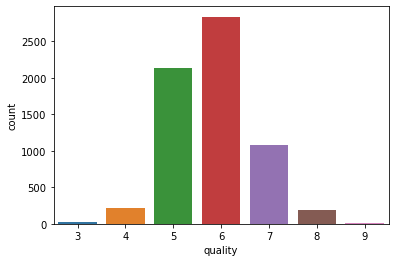

In [13]:
# countplot for Quality type
sns.countplot(df['quality'])

#### Observation:
1. from the above countplot,most of the wine's quality are in between 5 & 6.

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

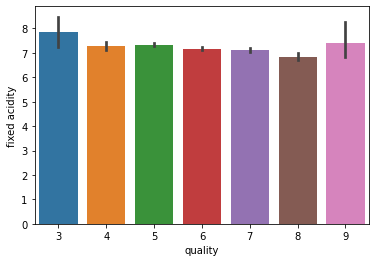

In [14]:
# Quality Vs Fixed acidity
sns.barplot(x='quality', y='fixed acidity', data=df)

#### Observation:
1. from above barplot, we see that fixed acidity does not give any specification to classify the quality.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

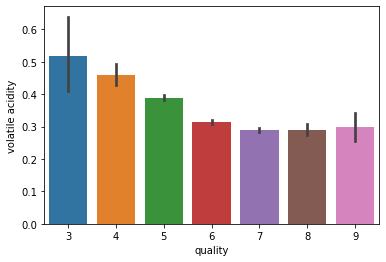

In [15]:
# Quality Vs volatile acidity
sns.barplot(x='quality',y='volatile acidity', data=df)

#### Observation:
1. From above barplot, we see that its quite a downing trend in the volatile acidity as we go higher the quality. 

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

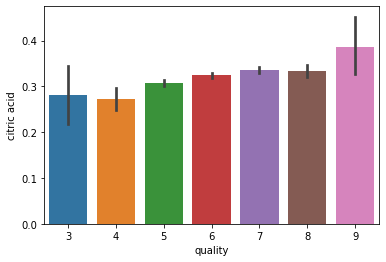

In [16]:
# Quality Vs citric acid
sns.barplot(x='quality',y='citric acid', data=df)

#### Observation:
1. from the above barplot, Composition of citric acid is high as we go higher in the quality of the wine.

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

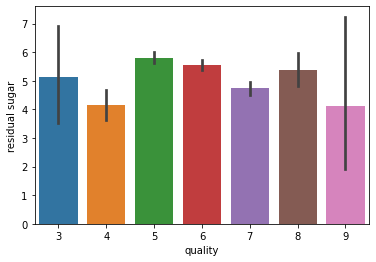

In [17]:
# Quality Vs residual sugar
sns.barplot(x='quality',y='residual sugar', data=df)

#### Observations:
1. from above barplot, we see that residual sugar does not give any specification to classify the quality.

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

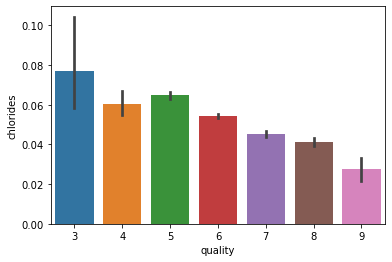

In [18]:
# Quality Vs chlorides
sns.barplot(x='quality', y='chlorides', data=df)

### Observation:
From above barplot, we see that its a downing trend in the chlorides as we go higher the quality.

Text(0, 0.5, 'Free sulfur dioxide')

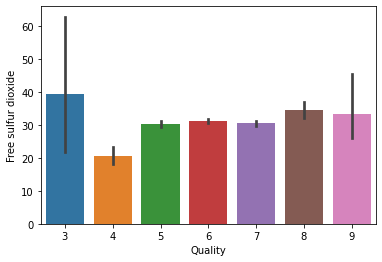

In [19]:
# Quality Vs free sulfur dioxide
sns.barplot(x='quality', y='free sulfur dioxide', data=df)
plt.xlabel("Quality")
plt.ylabel('Free sulfur dioxide')

#### Observation:
1. from above barplot, we see that free sulfer dioxide does not give any specification to classify the quality.

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

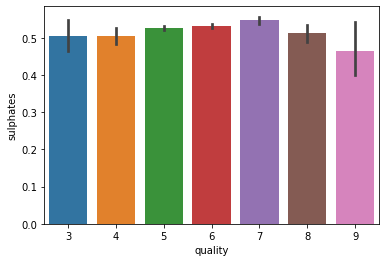

In [20]:
# Quality Vs sulphates
sns.barplot(x='quality', y='sulphates', data=df)

#### Observations:
1. from above barplot, we see that sulphates does not give any specification to classify the quality.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

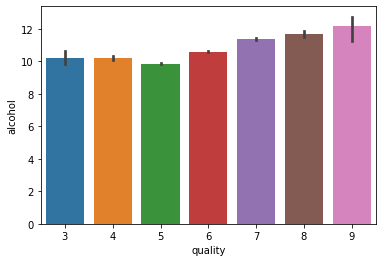

In [21]:
# Quality Vs Alcohol
sns.barplot(x='quality',y='alcohol',data=df)

#### Observation:
1. From the above plot, we can says that good quality of wine contain upto 11 to 12% of alcohol.
2. When the quality of wine is above 6 then percentage of alcohol is also increases.

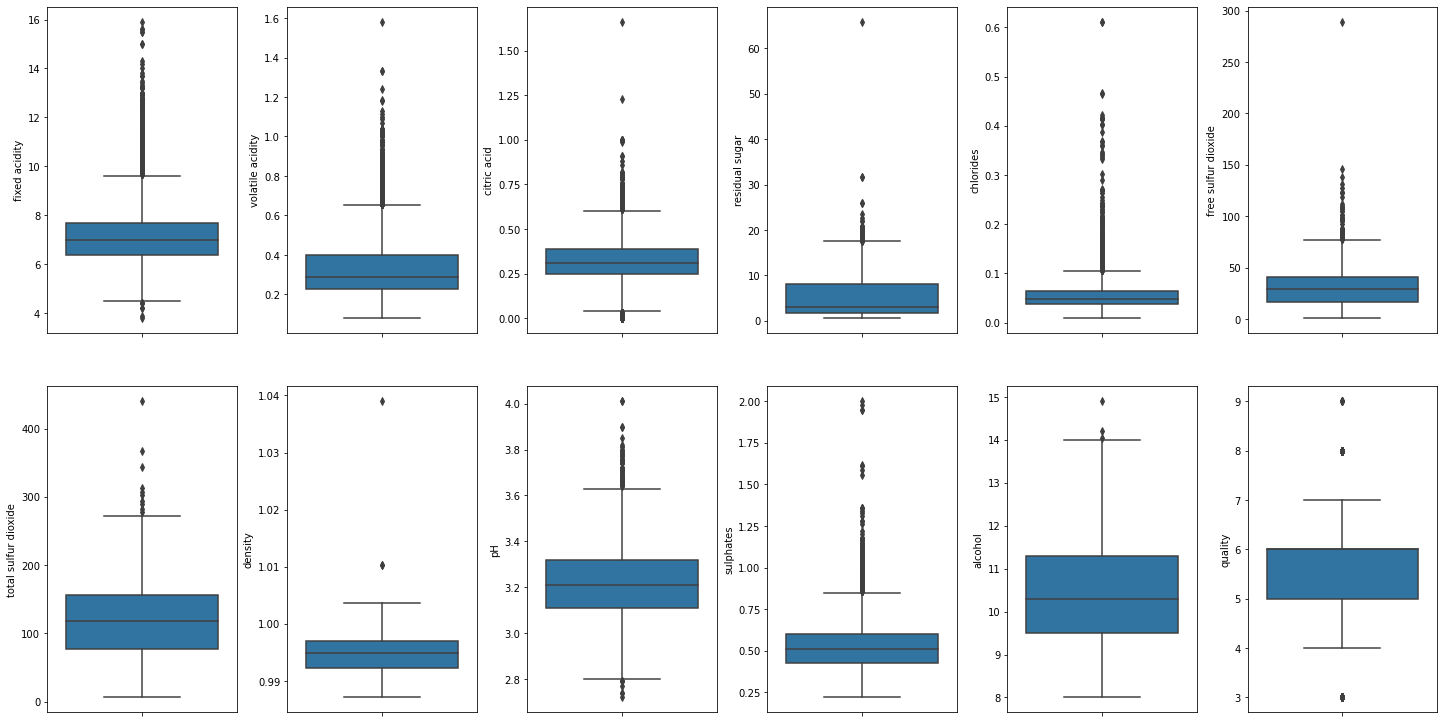

In [22]:
# Box plots 
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()
for col,value in num_col.items():
    sns.boxplot(y=col,data=num_col, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

#### Observations:
1. Here, we can clearly seen that, every features has one dot at the top of the boxplot. So this dot is known to be an outlier.
2. We can remove the outliers using z-score method on next method.

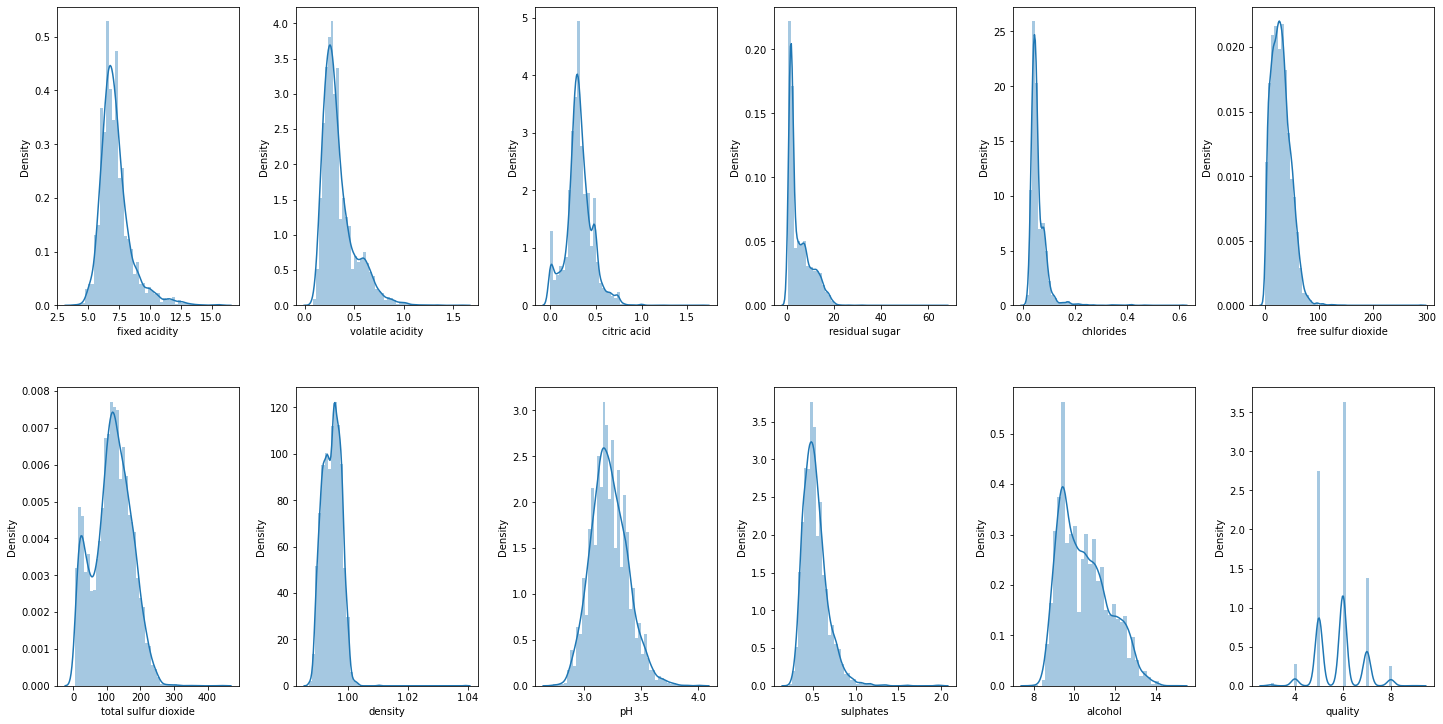

In [23]:
# Distribution plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()
for col,value in num_col.items():
    sns.distplot(value, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

### Observations:
1. We can see that, most of the features are normally distributed. But residual sugar,chlorides,density seems like a skewness in the data it's beacause of outliers.
2. If we remove the outliers,then the distribution of these features would be normal.
3. In above distplot, the difference between the values are very less except free sulfur dioxide. So, we can use log transformation for normally distribution.

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

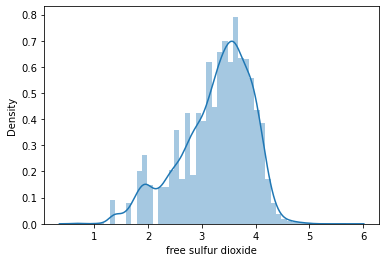

In [24]:
# log transformation for free sulfur dioxide
num_col['free sulfur dioxide'] = np.log(1 + num_col['free sulfur dioxide'])

#plot the distribution plot for free sulpher dioxide
sns.distplot(num_col['free sulfur dioxide'])

from above plot, we can clearly says that it is normally distributed.

In [25]:
#Check for the outliers
from scipy.stats import zscore
z = np.abs(zscore(num_col))
z

array([[0.1671586 , 0.4235636 , 0.28424515, ..., 0.5459591 , 1.41855821,
        0.20799905],
       [0.70742728, 0.24123152, 0.14652315, ..., 0.27706392, 0.83161516,
        0.20799905],
       [0.68183504, 0.36278624, 0.55968916, ..., 0.6131829 , 0.32852111,
        0.20799905],
       ...,
       [0.70742728, 1.03509307, 1.2995579 , ..., 1.47075478, 0.42611996,
        0.20799905],
       [1.01615224, 1.85558744, 1.3684189 , ..., 1.2018596 , 0.2446721 ,
        0.93722961],
       [0.938971  , 0.18045416, 1.04171618, ..., 0.86574062, 0.42611996,
        0.20799905]])

In [26]:
threshold=3
print(np.where(z>3))

(array([   0,    7,   40,   41,  182,  191,  194,  195,  196,  207,  250,
        251,  253,  292,  294,  325,  372,  444,  445,  484,  531,  600,
        683,  687,  729,  740,  745,  774,  820,  827,  830,  834,  859,
        873,  876,  946, 1034, 1034, 1051, 1158, 1163, 1217, 1229, 1250,
       1255, 1272, 1369, 1385, 1417, 1417, 1454, 1476, 1484, 1526, 1551,
       1598, 1599, 1605, 1608, 1638, 1653, 1653, 1663, 1663, 1681, 1688,
       1722, 1775, 1835, 1856, 1865, 1900, 1925, 1926, 1931, 1931, 1951,
       2024, 2026, 2036, 2050, 2050, 2127, 2154, 2186, 2186, 2321, 2349,
       2373, 2403, 2441, 2465, 2466, 2489, 2492, 2620, 2654, 2668, 2704,
       2705, 2711, 2771, 2781, 2781, 2781, 2785, 2787, 2820, 2849, 2874,
       2964, 3014, 3023, 3025, 3043, 3064, 3066, 3087, 3152, 3152, 3265,
       3283, 3288, 3307, 3409, 3420, 3497, 3497, 3547, 3619, 3623, 3668,
       3730, 3737, 3810, 3848, 3848, 3911, 3918, 3937, 3972, 3998, 3999,
       4000, 4012, 4039, 4107, 4109, 4173, 4173, 4

In [27]:
#remove the outliers
new = num_col[(z<3).all(axis=1)]

In [28]:
new.shape

(6015, 12)

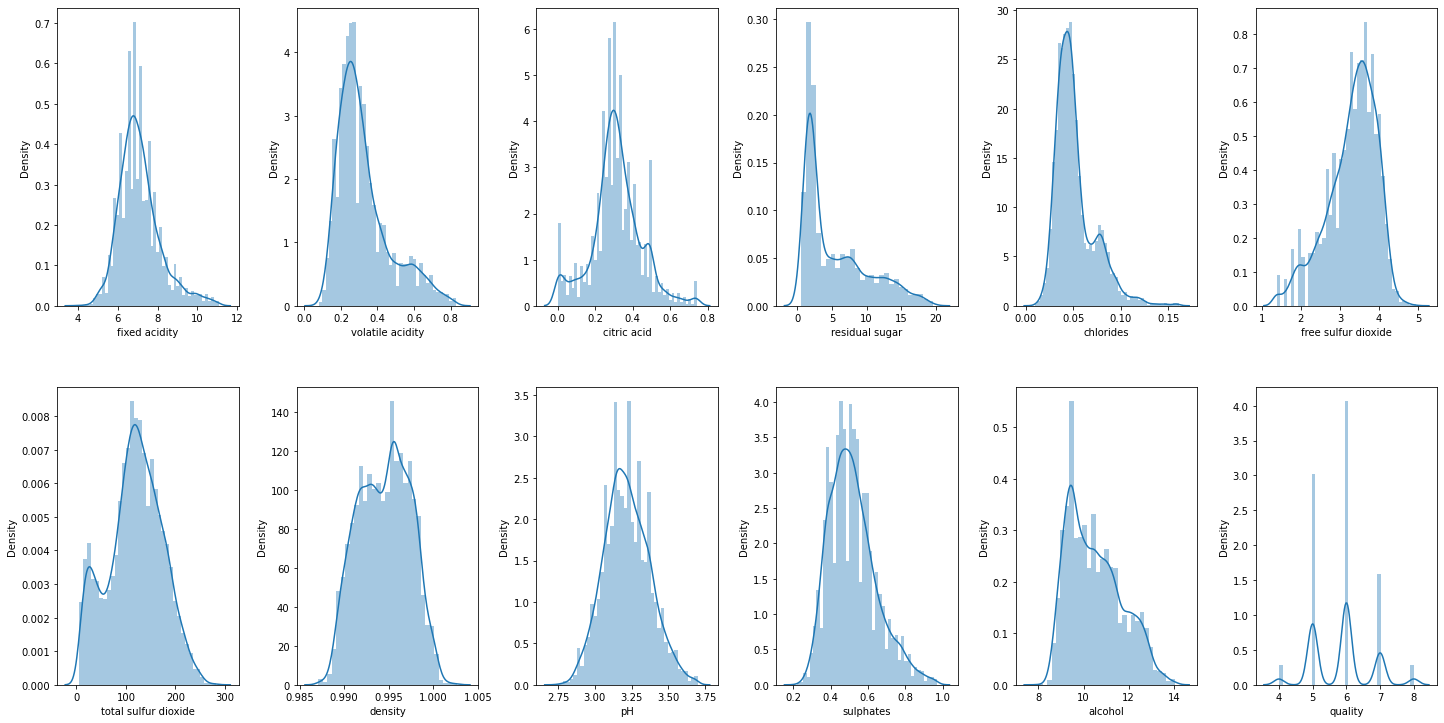

In [29]:
# Distribution plot
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index=0
ax=ax.flatten()
for col,value in new.items():
    sns.distplot(value, ax=ax[index])
    index+=1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

Text(0.5, 1.0, 'Correlation Matrix')

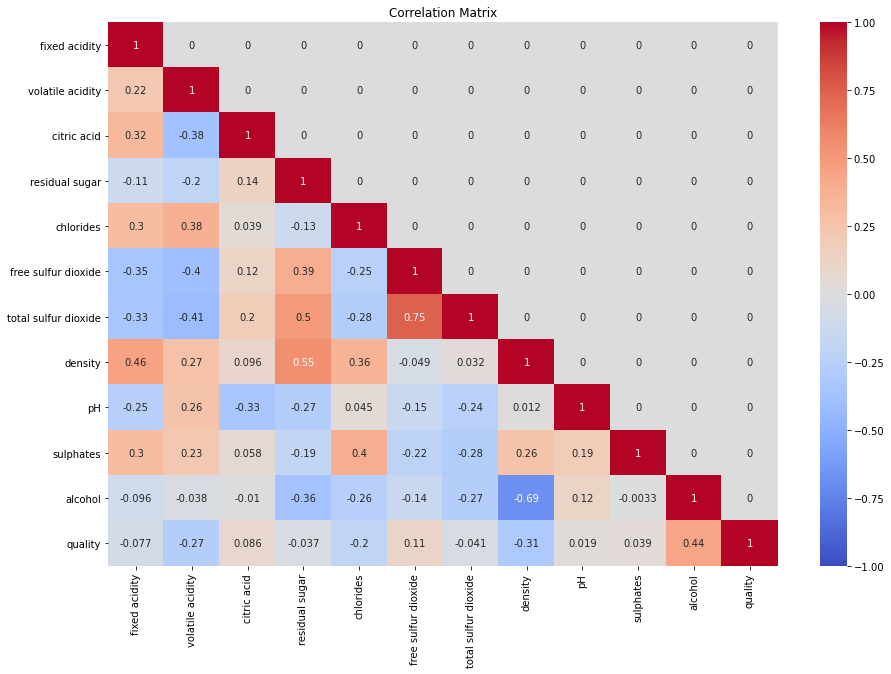

In [30]:
# correlation matrix - Take only lower traingle
cor = num_col.corr()
cor = np.tril(cor)
plt.figure(figsize=(15,10))
sns.heatmap(cor,xticklabels =num_col.columns,yticklabels=num_col.columns ,vmin=-1,vmax=1, annot=True, cmap='coolwarm', square=False)
plt.title("Correlation Matrix")

#### Observation:
1. From above heatmap, we can see that, there is no highly correlated variables with the target variable.
2. Most of the variables are negatively correlated with the target variable.
3. Alcohol is positively correlated with target variable.
4. Free_silfur_dioxide and total_sulfur_dioxide are highly correlated with each other.

In [31]:
#making binary classification for response variable
# classify the quantity in good and bad category
bins=(2,6.5,9)
group_names=['bad','good']
new['quality'] = pd.cut(new['quality'], bins=bins, labels=group_names)

In [32]:
new['quality'].value_counts()

bad     4797
good    1218
Name: quality, dtype: int64

In [33]:
# now assign lables to quality(bad:0,good:1)
lable_encoder = LabelEncoder()

# here bad becomes 0 and good becomes 1
new['quality'] = lable_encoder.fit_transform(new['quality'].astype('str'))

In [34]:
new.quality.value_counts()

0    4797
1    1218
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

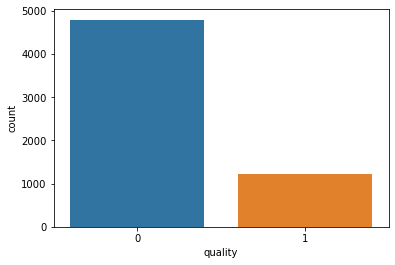

In [35]:
#Here 0 for 'bad' quality and 1 for 'good' quality
sns.countplot(new['quality'])

## Split the data into train and test set

In [36]:
# we drop the column type from independent variable beacause it is not necessary.
x_data = new.drop(['quality'],axis=1)
y_data = new['quality']

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=100)

In [38]:
# Dimentions of train and test data
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4210, 11), (4210,), (1805, 11), (1805,))

In [39]:
# Apply standardization to optimize the result
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Logistic regression

In [40]:
# Perform machine learning models
# 1. Logistic regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2',C=0.1)
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score,recall_score,roc_auc_score,classification_report,confusion_matrix
lr_acc = accuracy_score(y_test,lr_pred)
print("Accuracy score for Logistic model:",lr_acc)

Accuracy score for Logistic model: 0.8166204986149584


In [42]:
#Confusion matrix
print(confusion_matrix(y_test,lr_pred))

[[1364   69]
 [ 262  110]]


In [43]:
print(classification_report(y_test,lr_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      1433
           1       0.61      0.30      0.40       372

    accuracy                           0.82      1805
   macro avg       0.73      0.62      0.65      1805
weighted avg       0.79      0.82      0.79      1805



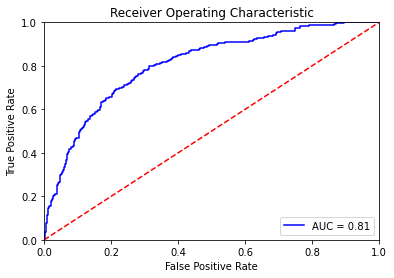

In [44]:
# Plot the roc curve
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = lr.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Decision Tree

In [45]:
# Build the decision tree model
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
dt_pred = DT.predict(x_test)

dt_acc = accuracy_score(y_test,dt_pred)
print("Accuracy score for decision tree:",dt_acc)

Accuracy score for decision tree: 0.8249307479224377


In [46]:
# Classification Report
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1433
           1       0.58      0.56      0.57       372

    accuracy                           0.82      1805
   macro avg       0.73      0.73      0.73      1805
weighted avg       0.82      0.82      0.82      1805



In [47]:
# Visualize the Tree
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

dot_data = StringIO()
export_graphviz(DT, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graphviz.Source(graph)
Image(graph.create_png())

In [48]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

param_grid = {
    'max_depth':[2,3,4],
    'max_features':[5,7,9,10],
    'min_samples_leaf':[2,3,5],
    'min_samples_split':[2,3,9],
    'criterion':['gini','entropy']
}

rds_dt = RandomizedSearchCV(DT, param_distributions=param_grid, cv=5)
rds_dt.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4],
                                        'max_features': [5, 7, 9, 10],
                                        'min_samples_leaf': [2, 3, 5],
                                        'min_samples_split': [2, 3, 9]})

In [49]:
#best_estimator
rds_dt.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=7,
                       min_samples_leaf=3)

In [50]:
# here we try to build the tree with best parameters
from sklearn.tree import DecisionTreeClassifier

DT2 = DecisionTreeClassifier(criterion='entropy',max_depth=4,max_features=10,min_samples_leaf=3,min_samples_split=3)
DT2.fit(x_train,y_train)
dt_pred2 = DT2.predict(x_test)

dt_acc2 = accuracy_score(y_test,dt_pred2)
print("Accuracy score for decision tree:",dt_acc2)

Accuracy score for decision tree: 0.817174515235457


In [51]:
#confusion matrix
print(confusion_matrix(y_test,dt_pred2))

[[1392   41]
 [ 289   83]]


In [52]:
#classification report
print(classification_report(y_test,dt_pred2))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1433
           1       0.67      0.22      0.33       372

    accuracy                           0.82      1805
   macro avg       0.75      0.60      0.61      1805
weighted avg       0.80      0.82      0.78      1805



From above classification report, 
1. Recall score is 0.81 that means very good model.
2. Accuracy score is 0.81 which is good score.

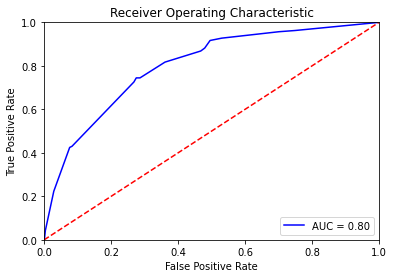

In [53]:
# calculate the fpr and tpr for all thresholds of the classification
probs = DT2.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

From above ROC curve, Area under curve(AUC score) is 0.82 that is very good model. 

# Random Forest

In [54]:
#Build the random forest model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

rf_acc = accuracy_score(y_test, rf_pred)
print("Accuracy score for random forest:",rf_acc)

Accuracy score for random forest: 0.8880886426592798


In [55]:
#classification report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1433
           1       0.83      0.57      0.68       372

    accuracy                           0.89      1805
   macro avg       0.87      0.77      0.80      1805
weighted avg       0.88      0.89      0.88      1805



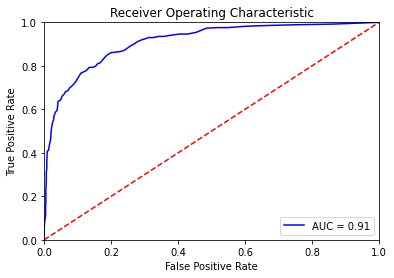

In [56]:
# Plot the ROC curve
# calculate the fpr and tpr for all thresholds of the classification
probs = rf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [57]:
# Feature importance
feature_imp = rf.feature_importances_
feature_imp

array([0.0662952 , 0.08618443, 0.07402985, 0.08248629, 0.09189293,
       0.07351684, 0.08142545, 0.12839512, 0.08113712, 0.08306895,
       0.15156782])

In [58]:
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

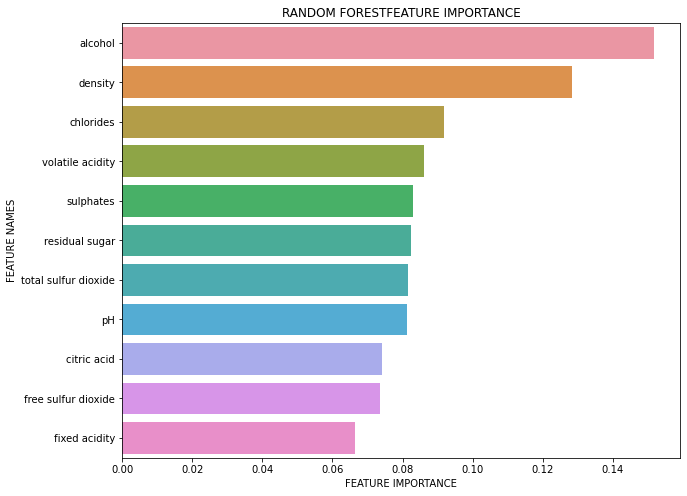

In [59]:
#call the plot function
plot_feature_importance(rf.feature_importances_, x_data.columns, 'RANDOM FOREST')

# KNN

In [60]:
# Build the KNN model
from sklearn.neighbors import KNeighborsClassifier

In [61]:
# create the function for knn with taking random value of n_neighbours is 5.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

In [62]:
print("Accuracy score of KNN model:", accuracy_score(y_test, knn_pred))

Accuracy score of KNN model: 0.83601108033241


In [63]:
# Previously, we build the model using k=5, now we find the value K which gives minimum error.
error = []
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean-error')

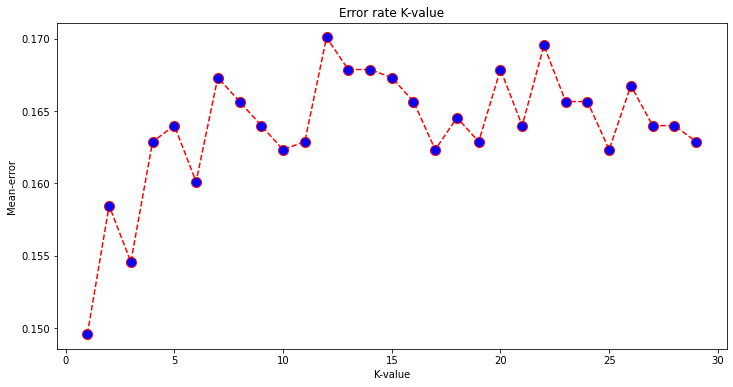

In [64]:
#Visualize the plot of the value of K with error
plt.figure(figsize=(12,6))
plt.plot(range(1,30), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title("Error rate K-value")
plt.xlabel("K-value")
plt.ylabel("Mean-error")

From the above plot,for the value of k=1 there is very less error. So, we can take this as the value of K. i.e. <b>K=1</b>

In [79]:
# Now we try to build the model with K=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)

In [80]:
knn_acc = accuracy_score(y_test, pred_knn)
print("Accuracy of the KNN model is:",knn_acc)

Accuracy of the KNN model is: 0.850415512465374


In [81]:
#Confusion Matrix
cm = confusion_matrix(y_test,pred_knn)
#sns.heatmap(cm, annot=True)
print(cm)

[[1305  128]
 [ 142  230]]


In [82]:
#Classification report
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1433
           1       0.64      0.62      0.63       372

    accuracy                           0.85      1805
   macro avg       0.77      0.76      0.77      1805
weighted avg       0.85      0.85      0.85      1805



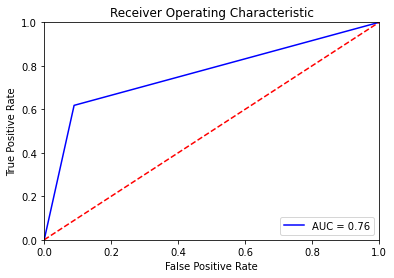

In [83]:
# Plot the ROC curve
# calculate the fpr and tpr for all thresholds of the classification
probs = knn.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# SVM

In [84]:
# Build the SVM model
from sklearn.svm import SVC

svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train,y_train)
svc_pred = svclassifier.predict(x_test)

svc_acc = accuracy_score(y_test, svc_pred)
print("Accuracy score of SVM model:",svc_acc)

Accuracy score of SVM model: 0.7939058171745152


In [85]:
#We can try to improve the accuracy of the model using grid search
param_grid = {'C':[0.1,0.01], 
              'gamma':[1,0.1,0.01], 
              'kernel':['linear','rbf']}

rds = RandomizedSearchCV(SVC(), param_distributions= param_grid, verbose=2, n_jobs=1)
rds.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ..................C=0.01, gamma=0.01, kernel=linear; total time=   0.1s
[CV] END ..................C=0.01, gamma=0.01, k

RandomizedSearchCV(estimator=SVC(), n_jobs=1,
                   param_distributions={'C': [0.1, 0.01],
                                        'gamma': [1, 0.1, 0.01],
                                        'kernel': ['linear', 'rbf']},
                   verbose=2)

In [86]:
# Best parameters
rds.best_params_

{'kernel': 'rbf', 'gamma': 0.1, 'C': 0.1}

In [73]:
# build a svm classifier with best parameters
svclassifier2 = SVC(kernel='rbf', gamma=0.1, C=0.1, probability=True) 
svclassifier2.fit(x_train,y_train)
svc_pred2 = svclassifier2.predict(x_test)

In [74]:
svc_acc = accuracy_score(y_test,svc_pred2)
print("Accuracy of the SVM model with best parameters: ",svc_acc)

Accuracy of the SVM model with best parameters:  0.8033240997229917


In [75]:
#Confusion matrix
confusion_matrix(y_test, svc_pred2)

array([[1428,    5],
       [ 350,   22]], dtype=int64)

In [76]:
#Classification report
print(classification_report(y_test, svc_pred2))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1433
           1       0.81      0.06      0.11       372

    accuracy                           0.80      1805
   macro avg       0.81      0.53      0.50      1805
weighted avg       0.81      0.80      0.73      1805



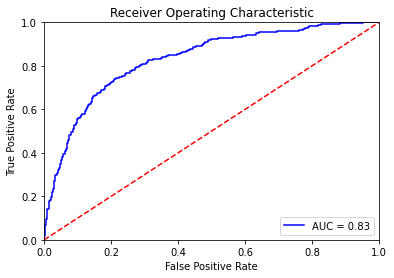

In [77]:
# Plot the ROC curve
# calculate the fpr and tpr for all thresholds of the classification
probs = svclassifier2.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [87]:
# create the dataframe to check which model gives best accuracy
Accuracy = pd.DataFrame({'Model_name':['Logistic Regression','Decision Tree','Random Forest','KNN','SVM'],
             "Accuracy":[lr_acc,dt_acc2,rf_acc,knn_acc,svc_acc]})
Accuracy

Model_name  Accuracy
0  Logistic Regression  0.816620
1        Decision Tree  0.817175
2        Random Forest  0.888089
3                  KNN  0.850416
4                  SVM  0.793906

<b>Random forest gives us best accuracy near about 88% for the Wine quality prediction model.</b>

## Conclusion:
1. I build Machine Learning models, out of these models Random forest model gives best accuracy as well as recall also.
2. My insights on wine quality is that, Alcohol and Density are the important feature when we talk about the wine quality.Higher Quality of wine has more percentage of alcohol.
